## Notebook for understanding logistic regression in numpy

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
np.random.seed(42)
class LogisticRegression:
    """
    Logistic Regression implementation using NumPy.

    Parameters:
    -----------
    learning_rate : float
        Learning rate for gradient descent
    max_iterations : int
        Maximum number of iterations for training
    tolerance : float
        Convergence tolerance for early stopping
    """

    def __init__(self, learning_rate=0.01, max_iterations=1000, tolerance=1e-6):
        self.learning_rate = learning_rate
        self.max_iterations = max_iterations
        self.tolerance = tolerance
        self.weights = None
        self.bias = None
        self.costs = []

    def _sigmoid(self, z):
        """Compute the sigmoid function."""
        # Clip z to prevent overflow
        z = np.clip(z, -500, 500)
        return 1 / (1 + np.exp(-z))

    def _compute_cost(self, y_true, y_pred):
        """Compute the binary cross-entropy cost."""
        # Add small epsilon to prevent log(0)
        epsilon = 1e-15
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

    def fit(self, X, y):
        """
        Train the logistic regression model.

        Parameters:
        -----------
        X : numpy array of shape (n_samples, n_features)
            Training features
        y : numpy array of shape (n_samples,)
            Target values (0 or 1)
        """
        n_samples, n_features = X.shape

        # Initialize weights and bias
        self.weights = np.random.normal(0, 0.01, n_features)
        self.bias = 0

        # Gradient descent
        for i in range(self.max_iterations):
            # Forward pass
            linear_model = np.dot(X, self.weights) + self.bias
            y_pred = self._sigmoid(linear_model)

            # Compute cost
            cost = self._compute_cost(y, y_pred)
            self.costs.append(cost)

            # Compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)

            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            # Check for convergence
            if i > 0 and abs(self.costs[-2] - self.costs[-1]) < self.tolerance:
                print(f"Converged after {i+1} iterations")
                break

        return self

    def predict_proba(self, X):
        """Predict probabilities for samples."""
        linear_model = np.dot(X, self.weights) + self.bias
        return self._sigmoid(linear_model)

    def predict(self, X, threshold=0.5):
        """Predict class labels for samples."""
        probabilities = self.predict_proba(X)
        return (probabilities >= threshold).astype(int)

In [13]:
def load_and_preprocess_titanic():
    """Load and preprocess the Titanic dataset."""
    # Load the dataset
    url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
    df = pd.read_csv(url)

    # Select relevant features
    features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
    df = df[features + ['Survived']].copy()

    # Handle missing values
    df['Age'].fillna(df['Age'].median(), inplace=True)
    df['Fare'].fillna(df['Fare'].median(), inplace=True)

    # Encode categorical variables
    df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

    # Separate features and target
    X = df[features].values
    y = df['Survived'].values

    # Feature scaling (standardization)
    X_mean = np.mean(X, axis=0)
    X_std = np.std(X, axis=0)
    X_scaled = (X - X_mean) / X_std

    return X_scaled, y, features

def plot_cost_function(costs):
    """Plot the cost function over iterations."""
    plt.figure(figsize=(10, 6))
    plt.plot(costs)
    plt.title('Cost Function Over Iterations')
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.grid(True)
    plt.show()

def evaluate_model(y_true, y_pred):
    """Calculate accuracy, precision, recall, and F1-score."""
    # Accuracy
    accuracy = np.mean(y_true == y_pred)

    # True positives, false positives, false negatives
    tp = np.sum((y_true == 1) & (y_pred == 1))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))

    # Precision, recall, F1-score
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    }

Loading and preprocessing Titanic dataset...


/tmp/ipython-input-3631982143.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-3631982143.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

Training set size: 712
Test set size: 179
Number of features: 6

Training logistic regression model...
Converged after 505 iterations


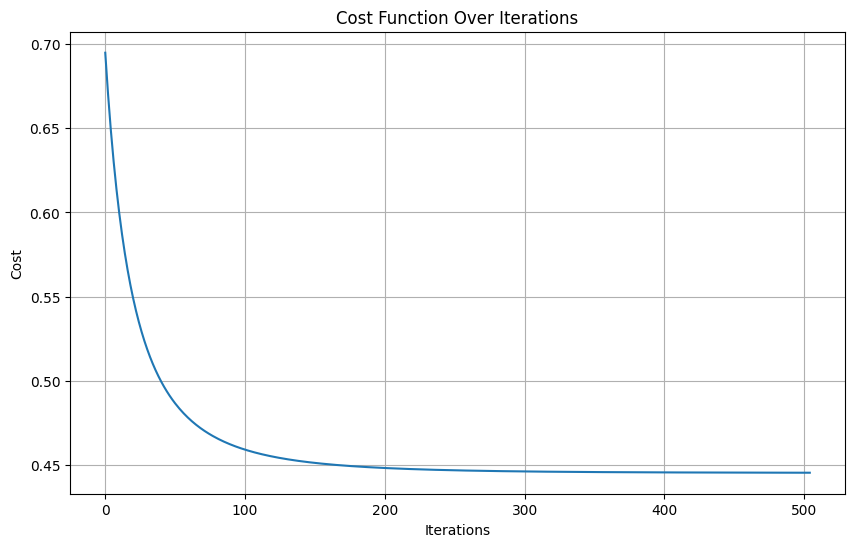


Training Metrics:
Accuracy: 0.7978
Precision: 0.7529
Recall: 0.7148
F1_score: 0.7333

Test Metrics:
Accuracy: 0.7765
Precision: 0.6866
Recall: 0.7077
F1_score: 0.6970

Feature Weights:
Pclass: -0.8751
Sex: 1.2620
Age: -0.5568
SibSp: -0.4228
Parch: -0.0567
Fare: 0.1916

Baseline accuracy (predicting most frequent class): 0.6369


In [14]:
if __name__ == "__main__":
    print("Loading and preprocessing Titanic dataset...")
    X, y, feature_names = load_and_preprocess_titanic()

    # Split the dataset (80% train, 20% test)
    n_samples = X.shape[0]
    n_train = int(0.8 * n_samples)

    # Shuffle indices
    indices = np.random.permutation(n_samples)
    train_idx, test_idx = indices[:n_train], indices[n_train:]

    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    print(f"Training set size: {X_train.shape[0]}")
    print(f"Test set size: {X_test.shape[0]}")
    print(f"Number of features: {X_train.shape[1]}")

    # Train the model
    print("\nTraining logistic regression model...")
    model = LogisticRegression(learning_rate=0.1, max_iterations=1000)
    model.fit(X_train, y_train)

    # Plot cost function
    plot_cost_function(model.costs)

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate the model
    train_metrics = evaluate_model(y_train, y_train_pred)
    test_metrics = evaluate_model(y_test, y_test_pred)

    print("\nTraining Metrics:")
    for metric, value in train_metrics.items():
        print(f"{metric.capitalize()}: {value:.4f}")

    print("\nTest Metrics:")
    for metric, value in test_metrics.items():
        print(f"{metric.capitalize()}: {value:.4f}")

    # Display feature weights
    print("\nFeature Weights:")
    for feature, weight in zip(feature_names, model.weights):
        print(f"{feature}: {weight:.4f}")

    # Calculate baseline accuracy (predicting most frequent class)
    baseline_accuracy = np.mean(y_test) if np.mean(y_test) > 0.5 else 1 - np.mean(y_test)
    print(f"\nBaseline accuracy (predicting most frequent class): {baseline_accuracy:.4f}")

## Scikit Learn Implementation

In [19]:
from sklearn.linear_model import LogisticRegression as SklearnLogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load and preprocess the data (using the function from the previous cells)
X, y, feature_names = load_and_preprocess_titanic()

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")
print(f"Number of features: {X_train.shape[1]}")

# Initialize and train scikit-learn logistic regression model
sklearn_model = SklearnLogisticRegression(random_state=42)
sklearn_model.fit(X_train, y_train)

# Make predictions
y_train_pred_sklearn = sklearn_model.predict(X_train)
y_test_pred_sklearn = sklearn_model.predict(X_test)

# Evaluate the model
train_metrics_sklearn = {
    'accuracy': accuracy_score(y_train, y_train_pred_sklearn),
    'precision': precision_score(y_train, y_train_pred_sklearn),
    'recall': recall_score(y_train, y_train_pred_sklearn),
    'f1_score': f1_score(y_train, y_train_pred_sklearn)
}

test_metrics_sklearn = {
    'accuracy': accuracy_score(y_test, y_test_pred_sklearn),
    'precision': precision_score(y_test, y_test_pred_sklearn),
    'recall': recall_score(y_test, y_test_pred_sklearn),
    'f1_score': f1_score(y_test, y_test_pred_sklearn)
}

print("\nScikit-learn Training Metrics:")
for metric, value in train_metrics_sklearn.items():
    print(f"{metric.capitalize()}: {value:.4f}")

print("\nScikit-learn Test Metrics:")
for metric, value in test_metrics_sklearn.items():
    print(f"{metric.capitalize()}: {value:.4f}")

# Display feature weights
print("\nScikit-learn Feature Weights:")
for feature, weight in zip(feature_names, sklearn_model.coef_[0]):
    print(f"{feature}: {weight:.4f}")

# Calculate baseline accuracy (predicting most frequent class)
baseline_accuracy = np.mean(y_test) if np.mean(y_test) > 0.5 else 1 - np.mean(y_test)
print(f"\nBaseline accuracy (predicting most frequent class): {baseline_accuracy:.4f}")

Training set size: 712
Test set size: 179
Number of features: 6

Scikit-learn Training Metrics:
Accuracy: 0.8034
Precision: 0.7689
Recall: 0.6828
F1_score: 0.7233

Scikit-learn Test Metrics:
Accuracy: 0.7989
Precision: 0.7794
Recall: 0.7162
F1_score: 0.7465

Scikit-learn Feature Weights:
Pclass: -0.7903
Sex: 1.2924
Age: -0.4090
SibSp: -0.3525
Parch: -0.1108
Fare: 0.1660

Baseline accuracy (predicting most frequent class): 0.5866


/tmp/ipython-input-3631982143.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-3631982143.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr